**Gå tilbake til [← innledningen](miljoanalyseprosjekt.ipynb) eller [← del 1](del1.ipynb) av prosjektet**

## **Del 2**
I mappe del 2 bygger vi videre på prosjektet gjennom følgende tilleggsoppgaver: Oppgave 4, benytte NumPy og Pandas for å analysere dataene og beregne statistiske mål som gjennomsnitt og standardavvik. I oppgave 5 skal vi lage informative visualiseringer av de analyserte dataene ved hjelp av Matplotlib. I oppgave 6 fokuserer dere på prediktiv analyse ved å implementere lineær regresjon for å forutsi fremtidige miljøforhold basert på historiske data.

Kode nødvendig for å kunne hente funksjoner senere:

In [1]:
import sys
import os

import pandas as pd

---

## **Oppgave 4: Dataanalyse**
Vi har brukt Pandas for å lese inn datasettet vårt som er i form av en CSV-fil, og brukt Pandas til å beregne de statiske målene på en enkel og effektiv måte. vi har brukt metodene .mean(), .median() og.std() for å finne gjennomsnittet, medianen og standardavviket av solskinnstimer i perioden 2016 til 2020.

Vi kunne brukt Pandas for sammenheng mellom to varibler som solskinnstimer og temperatur. Vi kunne brukt det til å regne ut korrealasjonskoeffisienten mellom de to med metoden .corr(). hvor en positiv korrelasjon villle indikert at høyere solskinnstimer sammenfallerr med høyere temperaturer. 

For å håndtere skevheter i dataene har vi laget en funksjon som går gjennom datasettet og identifiserer duplikater og manglende verdier. Den fyller inn de manglende verdiene og fjerner duplikatene slik at tallene som vi har brukt videre for å regne ut de statistiske tallene er mer pålitelig. Denne finner vi i oppgave 3 i del 1. 

Vi har integrert den beregnede medianen og gjennomsnittet i visualiseringen av dataene. dette gir et bedre oversikt over sentrale tendensene i datasettet, og gjør det lettere å forstå gjennomsnitt og medianen til tross for store variasjoner i dataene.

In [2]:
sti_til_sentralmal = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.insert(0, sti_til_sentralmal)

from sentralmal import statistikk 
    
filbane = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'utfylt_data.csv'))

median, gjennomsnitt, standardavvik = statistikk(filbane) #kaller på funksjonen og sender inn filbane

print("median er:", median) #summerer median
print("gjennomsnittet er:", gjennomsnitt) # summerergjennomsnittet
print("standardavviket er:", standardavvik) #finner standardavviket

median er: sunshine_hours    2.9
dtype: float64
gjennomsnittet er: sunshine_hours    4.385413
dtype: float64
standardavviket er: sunshine_hours    4.657096
dtype: float64


---

## **Oppgave 5: Visualisering**
Vi har valgt å bruke linjediagram for å visualisere miljødataene våre, hvor hvert år blir representert med egen linje.i tilegg har vi implementert median og gjennomsnitt for å få visualisert dette i dataene for å gjøre visualiseringen mer informativ. Denne måten å presentere dataene på gir en oversiktlig fremstilling av åren, og diagrammet gjør det enkelt åidentifisere sesongvariasjon og trender.

Det er lagt funksjoner for å hente inn data og konvertere dem og gjøre dem om til tabeller som vist under, og en funksjon for å lage grafen og visualisere den.

Det ville vært mulig å implementere interaktive visualiseringer med verktøy som Plotly ellerr Bokeh. Dette ville kunne gitt brukeren mulighet til å zoome, filtrere og utforske dataene på en dynamisk måte, dette ville kunnet øke brukervenligheten, forståelsen og gjøre det lettere å få åoversikt over dataene.

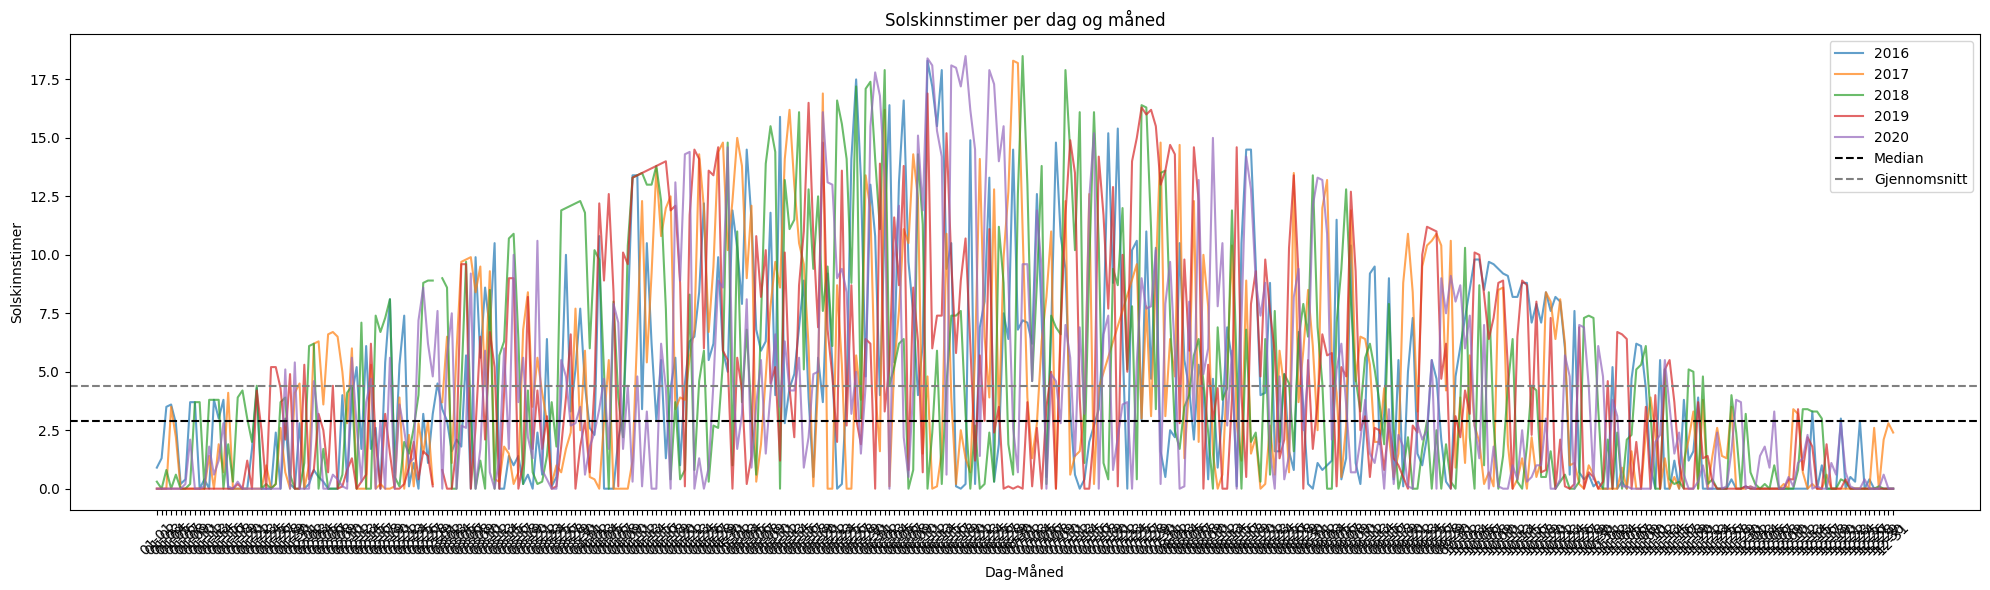

year,2016,2017,2018,2019,2020
day_month,,,,,
01-01,0.9,0.0,0.3,0.0,0.0
01-02,1.3,0.0,0.0,0.0,0.0
01-03,3.5,0.0,0.8,0.0,0.0
01-04,3.6,3.5,0.0,0.0,0.0
01-05,2.8,2.2,0.6,0.0,0.0
...,...,...,...,...,...
12-27,0.0,2.6,0.0,0.0,0.0
12-28,0.0,0.0,0.1,0.0,0.0
12-29,0.0,2.1,0.0,0.0,0.6


In [ ]:
sti_til_linjediagram = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.insert(0, sti_til_linjediagram)

from linjediagram import lage_graf
from sentralmal import statistikk
    
filbane = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'utfylt_data.csv'))

#path = os.path.join(os.path.dirname(__file__), '..', 'data', 'utfylt_data.csv') #filsti til csv
df = pd.read_csv(filbane) #leser csv filen
df['date'] = pd.to_datetime(df['date']) #konverterer datoen til datetime format
df['year'] = df['date'].dt.year #henter ut året fra datoen og legger i egen kolonne
df['day_month'] = df['date'].dt.strftime('%m-%d') #henter ut dag og måned fra datoen og legger i egen kolonne

median, gjennomsnitt,_ = statistikk(filbane) #henter median og gjennomsnitt fra statistikk funksjonen

lage_graf(
        df, 
        median=median['sunshine_hours'],
        gjennomsnitt=gjennomsnitt['sunshine_hours']
    )

---

## **Oppgave 6: Prediktiv analyse**

Denne oppgaven handler om prediktiv analyse og fokuserer på implementeringen av lineær regresjon ved hjelp av scikit-learn for å forutsi fremtidige miljøforhold basert på historiske data. Vi identifiserer også mulige feilkilder.

### Forarbeid
Til denne utregningen og visualiseringen bruker vi det ferdig renset datasettet som vi lagde i del 1 av prosjektet.

### Evaluering av predikasjonen
For å finne ut om predikasjonen var nøyaktig har vi valgt to ulike mål og en visualisering:
* Mean Squared Error (MSE) 
  * gir oss *gjennomsnittet av kvadrerte avvik* mellom faktiske og predikerte verdier 
* R²-score 
  * *forklaringsgrad*, sier noe om hvor mye variasjon i y modellen forklarer
* scatterplot visualisering
  * gjør at man kan evaluere predikasjonen uten stort kjenskap til mål som MSE og R²-score

#### **MSE: 15.3**
Dette betyr i realiteten at modellen i gjennomsnitt bommer på litt under 4 timer i estimeringen (kvadratroten av 15.3 ≈ 3.9). Dette er en del.

#### **R²-score:0.26 (26%)**
Modellen forklarer altså kun 26% av variasjonen i soltimer som er ganske svakt.

#### **Scatterplot**
Vi valgte å visualisere med scatterplot ettersom den er lett å kommunisere og gir en umiddelbar oppfattning om predikasjonen stemmer eller ikke og om det finnes mønstre eller skjevheter

### Hvorfor?

Modellen vi har laget predikerer kun med bakgrunn i hvilken dag i året det er og tar dermed ikke hensyn til tempratur, nedbør, skydekke eller lignende. Vi har benyttet sinus og cosinus for å imitere sesonger men utover dette vil det være vanskelig å lage en lineær regresjonsanalyse uten flere forklaringsvariabler.

Les mer om [MES og R²](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

mes: 15.298874936369792
R²-score: 0.26082447951706056


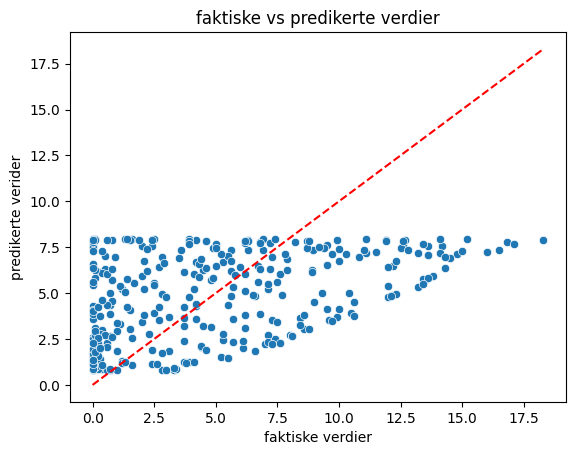

In [4]:
sys.path.append(os.path.abspath('..'))

from src.linjaer_reg import forbred_data, tren_pred

df, x, y = forbred_data("../data/utfylt_data.csv")
modell, prediksjon = tren_pred(df, x, y)

### Visualisering av predikerte verdier
Datasettet vårt sluttet 2021-01-01 og funksjonen for predikerte data er satt opp slik at den henter siste dato fra datasettet og predikerer et år fram i tid. Vi endte dermed opp med en visualisering av 2021.

For de tre visualiseringene valgte vi linjediagram, punktdiagram og histogram. De to første gir en veldig oversiktig graf som stemmer over ens med det vi har sett i visualiseringen av historiske data, og viser veldig tydlig sesongforskjellene. De ble valgt for å vise hvordan predikert solskinn utvikler seg over tid.

Histogrammet forteller oss hvor mange dager som har hatt de ulike mengdene solskinn og dermed demonstrerer at det er mang dager med 1 og 8 timer solskinn. Denne visualiseringen ble valgt for se hvordan dataen er fordelt og for å se om det er visse verdiområder som er enten under- eller overrepresenter. 

Det er nok linjediagramet som visualiserer den predikerte dataen på best måte, ettersom den både viser utvikling over tid men man kan også ta en viss vurdering om enkelte områder er over- eller underrepresentert.

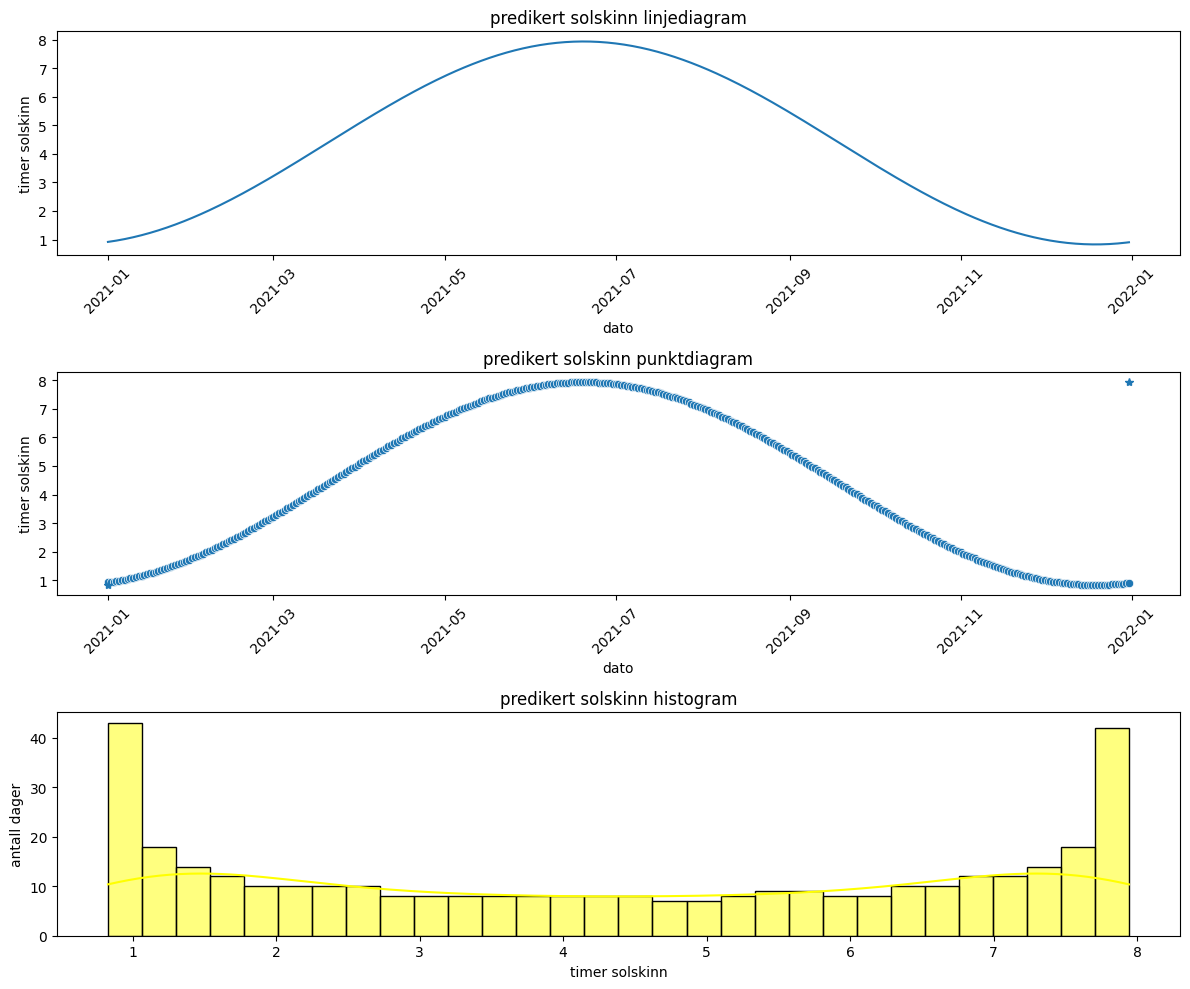

In [5]:
from src.linjaer_reg import vis_fremtid

vis_fremtid(df, modell)

#### Oppgave 7: Refleksjonsnotat
Skriv et refleksjonsnotat (maks 800 ord) etter gjennomføringen av prosjektet. Denne skal inneholde viktige punkter som gir innsikt i deres læringsprosess, erfaringer og vurderinger av prosjektet.

Vurderingskriterier:

Refleksjoner over hva du har lært om datainnsamling, databehandling, dataanalyse og visualisering.

Beskrivelse av nye ferdigheter som ble tilegnet, for eksempel bruk av spesifikke biblioteker (Pandas, NumPy, Matplotlib, etc.) og programmeringskonsepter.

Identifisering av spesifikke utfordringer som oppstod under prosjektet, for eksempel problemer med datakvalitet, håndtering av manglende verdier, eller tekniske problemer med API-er.

Refleksjoner over samarbeidet i gruppen, inkludert hvordan oppgaver ble fordelt og hvordan kommunikasjonen fungerte.

Vurdering av de endelige resultatene, inkludert kvaliteten på visualiseringene og analysene.

Ideer til hvordan prosjektet kan forbedres i fremtiden, både i forhold til tekniske aspekter og prosjektledelse.

Mulige retninger for videre forskning eller utvikling basert på erfaringene fra prosjektet.

Oppsummering av de viktigste læringspunktene og hvordan prosjektet har bidratt til studentenes forståelse av datavitenskap og miljøstudier.

Personlige tanker om hvordan erfaringene fra prosjektet kan anvendes i fremtidige studier eller yrkesliv.

# ta med andre værforhold inni predaktiv analyse

**Gå tilbake til [← innledningen](miljoanalyseprosjekt.ipynb) eller [← del 1](del1.ipynb) av prosjektet**